In [6]:
# !pip install selenium


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import requests
from bs4 import BeautifulSoup

In [9]:
url = 'https://search.shopping.naver.com/search/all?frm=NVSHCHK&origQuery=%EB%8F%84%EC%8B%9C%EB%9D%BD&pagingIndex=1&pagingSize=40&productSet=checkout&query=%EB%8F%84%EC%8B%9C%EB%9D%BD&sort=review&timestamp=&viewType=list#'
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [10]:
driver = webdriver.Chrome()
driver.get(url)

In [11]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

In [12]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [13]:
food_items = soup.select('.basicList_inner__xCM3J')
print(len(food_items))

40


In [14]:
food_item = food_items[0]
food_item

<div class="basicList_inner__xCM3J"><div class="basicList_img_area__AdRY_"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z" data-nclick="N=a:lst*N.image,r:1,i:81506404972" data-testid="SEARCH_PRODUCT" href="https://cr.shopping.naver.com/adcr.nhn?x=oykXPE5rwwtEPDFDSRxXpf%2F%2F%2Fw%3D%3DsXbbl7MKt1qMPvsWICo34if%2Bzqz9awB4Msmm6KQlxdK2eERs7QaGSSeK7VV2uQBh%2Fg5rv71DoiUelutXP4VFC5ujbu7RdqfRgImRxAyQFLffOTYQ9AWs06tuMpIClMqIA9xkd1tvIo57cU0Raj0jz7kS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOoqkmGErciH1%2FLeJhmxcWy8tCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroeKiHHZIotyMJJmLBQxE0eg47SoohC4p1i4CCz39oGT8UV36ogsAbT2GMBHUreotiQIXm%2FNHxA2t4gtbMQhbt4m36OpIAatclLNQSq9mK9qFWLwQlLdAj0GgIUVW8DBpttKOVBkJaB6am%2BPEYCQmdp8C4lGpTAh08wyb7vBodH4FJwAX%2BSYZhqjzBZhOTOCKM2MF5fhMYYsbFWyOufI9OITwS4mKPfkpDcoOy%2FT5vxXWWg2llS8vDFaI4I%2Fqho3VHors%2BeECmO1bIrumVy3uePN1uAIyLiXPBBbIoAbrHE8FqKYTOF5KsHq%2BigGAc1pAeZ%2B1wr2GRfi6FwVU9oR1oMSaUqjINYVQ09qxOQWi5CBxEGzc0nt

In [16]:
link = food_item.select('.basicList_title__VfX3c > a')[0].attrs['href']
link

'https://cr.shopping.naver.com/adcr.nhn?x=oykXPE5rwwtEPDFDSRxXpf%2F%2F%2Fw%3D%3DsXbbl7MKt1qMPvsWICo34if%2Bzqz9awB4Msmm6KQlxdK2eERs7QaGSSeK7VV2uQBh%2Fg5rv71DoiUelutXP4VFC5ujbu7RdqfRgImRxAyQFLffOTYQ9AWs06tuMpIClMqIA9xkd1tvIo57cU0Raj0jz7kS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOoqkmGErciH1%2FLeJhmxcWy8tCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroeKiHHZIotyMJJmLBQxE0eg47SoohC4p1i4CCz39oGT8UV36ogsAbT2GMBHUreotiQIXm%2FNHxA2t4gtbMQhbt4m36OpIAatclLNQSq9mK9qFWLwQlLdAj0GgIUVW8DBpttKOVBkJaB6am%2BPEYCQmdp8C4lGpTAh08wyb7vBodH4FJwAX%2BSYZhqjzBZhOTOCKM2MF5fhMYYsbFWyOufI9OITwS4mKPfkpDcoOy%2FT5vxXWWg2llS8vDFaI4I%2Fqho3VHors%2BeECmO1bIrumVy3uePN1uAIyLiXPBBbIoAbrHE8FqKYTOF5KsHq%2BigGAc1pAeZ%2B1wr2GRfi6FwVU9oR1oMSaUqjINYVQ09qxOQWi5CBxEGzc0ntIH97qtt%2F4miE2Ad8tVYavx%2B%2B8fWZa9SBc8rqM%3D&nvMid=81506404972&catId=50006199'

In [17]:
# 제품 이동
driver.get(link)

In [19]:
# 리뷰
driver.find_element(By.XPATH, '//*[@id="content"]/div/div[3]/div[3]/ul/li[2]/a').click()
time.sleep(1)

In [20]:
# 리뷰 최신순
driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div[3]/div[1]/div[1]/ul/li[2]/a').click()
                               //*[@id="REVIEW"]/div/div[3]/div[1]/div[1]/ul/li[2]/a
time.sleep(1)

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리" name="description"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리 : 미스터네이처 다이어트" property="og:title"/>
<meta content="https://shop-phinf.pstatic.net/20230503_213/1683091449760C58f5_JPEG/9731541266627855_510689470.jpg?type=o1000" property="og:image"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리 : 미스터네이처 다이어트" name="twitter:title"/>
<meta content="https://shop-phinf.pstatic.net/20230503_213/1683091449760C58f5_JPEG/9731541266627855_510689470.jpg?type=o1000" name="twitter:image"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리
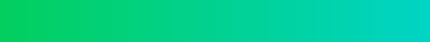
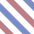
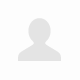
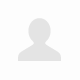

In [21]:
sup_html = driver.page_source
sup_soup = BeautifulSoup(sup_html, 'html.parser')
sup_soup

In [22]:
review_list = sup_soup.select('.TsOLil1PRz')[0]
review_list

<ul class="TsOLil1PRz"><li class="_2389dRohZq"><div class="_1-CNpGwOcC"><div class="_30o7PGmsIy"><div class="_1yIGHygFbx"><div class="_1XNnRviOK8"><div class="_3kszHSdr4m"><div class="_1YShY6EQ56"><div class="_1rZLm75kLm"><div class="BhXxGSggNI"><img alt="프로필_image" class="_2A8ItnjwLq" data-src="https://profile-phinf.pstatic.net/404/default.png?type=f80_80" src="https://profile-phinf.pstatic.net/404/default.png?type=f80_80"/></div><div class="_37TlmH3OaI"><div class="_2V6vMO_iLm"><span class="_9iVSaZa02j"><span class="_3hrdz1EXfJ" style="width: 100%;"><span class="blind">평점</span></span></span><em class="_15NU42F3kT">5</em></div><div class="_2FmJXrTVEX"><strong class="_3QDEeS6NLn">sh****</strong><span class="_3QDEeS6NLn">23.05.08.</span><div class="_1JZCQjfNPR"><a class="_1At-_FVDqr @N=a:rvs.report" href="#" role="button" title="새 창">신고</a></div></div><div class="_14FigHP3K8">상품구성: 26_김치볶음밥＆닭가슴살햄<dl class="_3QC2SDSKkZ"><div class="_2lh7oBgBrF"><dt class="_1yrmOZ-K3F">포장</dt><dd class="

In [23]:
review = review_list.select('li')[0]
review

<li class="_2389dRohZq"><div class="_1-CNpGwOcC"><div class="_30o7PGmsIy"><div class="_1yIGHygFbx"><div class="_1XNnRviOK8"><div class="_3kszHSdr4m"><div class="_1YShY6EQ56"><div class="_1rZLm75kLm"><div class="BhXxGSggNI"><img alt="프로필_image" class="_2A8ItnjwLq" data-src="https://profile-phinf.pstatic.net/404/default.png?type=f80_80" src="https://profile-phinf.pstatic.net/404/default.png?type=f80_80"/></div><div class="_37TlmH3OaI"><div class="_2V6vMO_iLm"><span class="_9iVSaZa02j"><span class="_3hrdz1EXfJ" style="width: 100%;"><span class="blind">평점</span></span></span><em class="_15NU42F3kT">5</em></div><div class="_2FmJXrTVEX"><strong class="_3QDEeS6NLn">sh****</strong><span class="_3QDEeS6NLn">23.05.08.</span><div class="_1JZCQjfNPR"><a class="_1At-_FVDqr @N=a:rvs.report" href="#" role="button" title="새 창">신고</a></div></div><div class="_14FigHP3K8">상품구성: 26_김치볶음밥＆닭가슴살햄<dl class="_3QC2SDSKkZ"><div class="_2lh7oBgBrF"><dt class="_1yrmOZ-K3F">포장</dt><dd class="_1BgHSj04oF">꼼꼼해요</dd><

In [88]:
# 상품명
name = review.select('._14FigHP3K8')[0].find('div')
name

<div class="_2lh7oBgBrF"><dt class="_1yrmOZ-K3F">포장</dt><dd class="_1BgHSj04oF">적당해요</dd></div>

In [89]:
# 상품명
name = review.select('._14FigHP3K8')[0]
name

<div class="_14FigHP3K8">홈슐랭 도시락 5종: 병아리콩귀리밥과 새우팟퐁커리<dl class="_3QC2SDSKkZ"><div class="_2lh7oBgBrF"><dt class="_1yrmOZ-K3F">포장</dt><dd class="_1BgHSj04oF">적당해요</dd></div><div class="_2lh7oBgBrF"><dt class="_1yrmOZ-K3F">편리</dt><dd class="_1BgHSj04oF">편리해요</dd></div><div class="_2lh7oBgBrF _2v4M2P83qi"><dt class="_1yrmOZ-K3F">맛 만족도</dt><dd class="_1BgHSj04oF">맛있어요</dd></div></dl></div>

In [24]:
# 별점
score = int(review.select('._15NU42F3kT')[0].get_text())
score

5

In [25]:
# 리뷰 글
text = review.select('._3QDEeS6NLn')[2].get_text()
text

'배송빠르고 제품 잘왔습니다.'

In [26]:
# 리뷰 글 한 페이지
sup_html = driver.page_source
sup_soup = BeautifulSoup(sup_html, 'html.parser')
sup_soup

ls = []
cnt = 0

for reviews in review_list:
    review_list = sup_soup.select('.TsOLil1PRz')[0]
    review = review_list.select('li')[cnt]
    score = int(review.select('._15NU42F3kT')[0].get_text())
    text = review.select('._3QDEeS6NLn')[2].get_text()
    ls.append([score, text])
    cnt = cnt + 1
ls

[[5, '배송빠르고 제품 잘왔습니다.'],
 [5, '배송빠르고 제품 잘왔습니다.'],
 [5, '배송빠르고 제품 잘왔습니다.'],
 [5, '아주맛있습니다추천드려요'],
 [5, '도시락 맛 괜찮고 양도 다이어트용도로는 적당한듯합니다'],
 [5, '좋아요 맛있게 잘 먹고 있어요!!'],
 [4, '맛은 좋다는데 양이 아기밥 같이 적음'],
 [5, '맛의 편차는 좀 있지만 그래도 먹을만합니다.'],
 [5, '맛의 편차는 좀 있지만 그래도 먹을만합니다.'],
 [5, '회사 도시락으로 먹고있어요 편하고 좋습니다!'],
 [5, '늘 시켜먹는 도시락입니다 좋아요!'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ']]

In [27]:
# 1 ~ 5 페이지 리뷰 글
ls = []

for i in range(2,7):
    print(f'{i-1}페이지 시작')
    driver.find_element(By.XPATH, f'//*[@id="REVIEW"]/div/div[3]/div[2]/div/div/a[{i}]').click()
    time.sleep(2)
    
    sup_html = driver.page_source
    sup_soup = BeautifulSoup(sup_html, 'html.parser')
    sup_soup

    cnt = 0

    for reviews in review_list:
        review_list = sup_soup.select('.TsOLil1PRz')[0]
        review = review_list.select('li')[cnt]
        score = int(review.select('._15NU42F3kT')[0].get_text())
        text = review.select('._3QDEeS6NLn')[2].get_text()
        ls.append([score, text])
        cnt = cnt + 1
    print(f'{i-1}페이지 끝')
ls

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
5페이지 시작
5페이지 끝


[[5, '배송빠르고 제품 잘왔습니다.'],
 [5, '배송빠르고 제품 잘왔습니다.'],
 [5, '배송빠르고 제품 잘왔습니다.'],
 [5, '아주맛있습니다추천드려요'],
 [5, '도시락 맛 괜찮고 양도 다이어트용도로는 적당한듯합니다'],
 [5, '좋아요 맛있게 잘 먹고 있어요!!'],
 [4, '맛은 좋다는데 양이 아기밥 같이 적음'],
 [5, '맛의 편차는 좀 있지만 그래도 먹을만합니다.'],
 [5, '맛의 편차는 좀 있지만 그래도 먹을만합니다.'],
 [5, '회사 도시락으로 먹고있어요 편하고 좋습니다!'],
 [5, '늘 시켜먹는 도시락입니다 좋아요!'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...ㅎ'],
 [5, '맛있어서 또 주문 합니다~ !!! \n감사합니다~'],
 [5, '너무 맛있어요! 하나 먹어도 배부르고 무엇보다 새벽배송 서비스도 좋네요'],
 [5, '너무 맛있어요! 하나 먹어도 배부르고 무엇보다 새벽배송 서비스도 좋네요'],
 [5, '너무 맛있어요! 하나 먹어도 배부르고 무엇보다 새벽배송 

In [30]:
len(ls)

100

In [31]:
# !pip install pandas
import pandas as pd

In [32]:
# 데이터 프레임 생성
df = pd.DataFrame(ls, columns=['평점', '리뷰'])
df

,평점,리뷰
0,5,배송빠르고 제품 잘왔습니다.
1,5,배송빠르고 제품 잘왔습니다.
2,5,배송빠르고 제품 잘왔습니다.
3,5,아주맛있습니다추천드려요
4,5,도시락 맛 괜찮고 양도 다이어트용도로는 적당한듯합니다
...,...,...
95,5,건강식으로 아주 잘먹었어요 또 시켰습니다!!
96,5,건강식으로 아주 잘먹었어요 또 시켰습니다!!
97,5,현미야채밥이 밥 중에 가장 맛있음
98,5,건강식으로 아주 잘먹었어요 또 시켰습니다!!


In [ ]:
# 파일 저장
# df.to_csv("./csv/danawa_crawling.csv", index=False)

# 구매 건수가 있으면서 네이버 톡톡 있는 페이지만 이동

In [238]:
driver = webdriver.Chrome()
driver.get(url)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [176]:
food_items = soup.select('.basicList_inner__xCM3J')
food_items[0]

<div class="basicList_inner__xCM3J"><div class="basicList_img_area__AdRY_"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z" data-nclick="N=a:lst*N.image,r:1,i:81506404972" data-testid="SEARCH_PRODUCT" href="https://cr.shopping.naver.com/adcr.nhn?x=c5%2FYTxYykcbw1J4TfHdeOv%2F%2F%2Fw%3D%3DsIxD78Q6gfD1odOFfznTC%2FYjBes6b4L%2FoKOQ2oEtI4dgQpd6z0GmZKw5N2gLjIek2rSMs2yY0%2BzTM3ZFt2T8SI4A04Kvqeb%2BqBTIw5XVYuO5EsB%2BRI08X2Kp1vj65S3cBiTGdbHvqTnQ8SDSfceXwKUuG%2FicFY3q9hGdjro9%2BnxTWlthmIe9RtHIiOuCPe0FEYpiqnNabHNYpvBnCIQFI5ckJ6KFIF2qgLVo9n32aIGek6v2w9jBqMGR4TTsgYaQnlII%2ByYYqWVu3SSXxcjEJdOc452y5VYh2M1vd0%2BONAhq8mA7n09hER1XTkfgcq9YPzq1V4xPRk%2FVPEqucIFXywaLZ6Q6sNOtCS6Xx4unsu5VK8CStOOFp2%2FtYSdT0MlcbKVHcH0IPImWOgY1VoDzrp1UKv%2BFLrWPdc8iqFfE5ssAzmz5AKde3j0%2Fcj17gvEyW65kURrR3QC1cBijjyTs%2FFZvzcz7v403h1vNptDnf6kmO0LJr1i38K1b0e1SkfDnVjDqQt7v7qNpbQDxTg3E%2Fudo7bQ1627cKdiEtV5EAn5StQf9qWmf8b7DB6wscogy1is%2BdPhZ4x%2B%2BCPFdlXV2tnJYuFzFHeYVdkBXDgd91YSVH%2B806BUh6N2IDnyMn6c

In [203]:
food_item = food_items[0]
food_item

<div class="basicList_inner__xCM3J"><div class="basicList_img_area__AdRY_"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z" data-nclick="N=a:lst*N.image,r:1,i:81506404972" data-testid="SEARCH_PRODUCT" href="https://cr.shopping.naver.com/adcr.nhn?x=c5%2FYTxYykcbw1J4TfHdeOv%2F%2F%2Fw%3D%3DsIxD78Q6gfD1odOFfznTC%2FYjBes6b4L%2FoKOQ2oEtI4dgQpd6z0GmZKw5N2gLjIek2rSMs2yY0%2BzTM3ZFt2T8SI4A04Kvqeb%2BqBTIw5XVYuO5EsB%2BRI08X2Kp1vj65S3cBiTGdbHvqTnQ8SDSfceXwKUuG%2FicFY3q9hGdjro9%2BnxTWlthmIe9RtHIiOuCPe0FEYpiqnNabHNYpvBnCIQFI5ckJ6KFIF2qgLVo9n32aIGek6v2w9jBqMGR4TTsgYaQnlII%2ByYYqWVu3SSXxcjEJdOc452y5VYh2M1vd0%2BONAhq8mA7n09hER1XTkfgcq9YPzq1V4xPRk%2FVPEqucIFXywaLZ6Q6sNOtCS6Xx4unsu5VK8CStOOFp2%2FtYSdT0MlcbKVHcH0IPImWOgY1VoDzrp1UKv%2BFLrWPdc8iqFfE5ssAzmz5AKde3j0%2Fcj17gvEyW65kURrR3QC1cBijjyTs%2FFZvzcz7v403h1vNptDnf6kmO0LJr1i38K1b0e1SkfDnVjDqQt7v7qNpbQDxTg3E%2Fudo7bQ1627cKdiEtV5EAn5StQf9qWmf8b7DB6wscogy1is%2BdPhZ4x%2B%2BCPFdlXV2tnJYuFzFHeYVdkBXDgd91YSVH%2B806BUh6N2IDnyMn6c

In [239]:
cnt = 0
for i in food_items:
    food_item = food_items[cnt]
    cnt = cnt + 1
    a = food_item.select('.basicList_etc_box__5lkgg')[0].get_text()
    if "구매건수" in a:
        if "톡톡" in a:
            print(f'********{cnt}*********')
            print('톡톡')
            print(a)
            link = food_item.select('.basicList_title__VfX3c > a')[0].attrs['href']
            print(link)
            print(f'********{cnt}*********')
            driver.get(link)
            time.sleep(2)
    else:
        print('없음')
    # talktalk_link_talk__rqu4I

********1*********
톡톡
리뷰281,421구매건수152,336등록일 2018.12.찜하기6456신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=c5%2FYTxYykcbw1J4TfHdeOv%2F%2F%2Fw%3D%3DsIxD78Q6gfD1odOFfznTC%2FYjBes6b4L%2FoKOQ2oEtI4dgQpd6z0GmZKw5N2gLjIek2rSMs2yY0%2BzTM3ZFt2T8SI4A04Kvqeb%2BqBTIw5XVYuO5EsB%2BRI08X2Kp1vj65S3cBiTGdbHvqTnQ8SDSfceXwKUuG%2FicFY3q9hGdjro9%2BnxTWlthmIe9RtHIiOuCPe0FEYpiqnNabHNYpvBnCIQFI5ckJ6KFIF2qgLVo9n32aIGek6v2w9jBqMGR4TTsgYaQnlII%2ByYYqWVu3SSXxcjEJdOc452y5VYh2M1vd0%2BONAhq8mA7n09hER1XTkfgcq9YPzq1V4xPRk%2FVPEqucIFXywaLZ6Q6sNOtCS6Xx4unsu5VK8CStOOFp2%2FtYSdT0MlcbKVHcH0IPImWOgY1VoDzrp1UKv%2BFLrWPdc8iqFfE5ssAzmz5AKde3j0%2Fcj17gvEyW65kURrR3QC1cBijjyTs%2FFZvzcz7v403h1vNptDnf6kmO0LJr1i38K1b0e1SkfDnVjDqQt7v7qNpbQDxTg3E%2Fudo7bQ1627cKdiEtV5EAn5StQf9qWmf8b7DB6wscogy1is%2BdPhZ4x%2B%2BCPFdlXV2tnJYuFzFHeYVdkBXDgd91YSVH%2B806BUh6N2IDnyMn6cuwV3OdHgSE8LoEjTx9zpNPbFaRsOtQUnaEEbxBoHxZXOc%3D&nvMid=81506404972&catId=50006199
********1*********
없음
********3*********
톡톡
리뷰57,680구매건수29,423등록일 2019.07.찜하기1382신고하기톡톡
http

없음
없음
없음
없음
********22*********
톡톡
리뷰14,610구매건수3,677등록일 2019.11.찜하기349신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=PzpxgtIBMRE%2B4CPzfk5vnP%2F%2F%2Fw%3D%3DsCx8VlPePfoG7iQ%2FNVissPR08We8V6A%2F%2FJamdlPTN5rGeERs7QaGSSeK7VV2uQBh%2F8%2BQHADr6d%2Ba6DpzpswEwOkFdk4VAH3ptKUFb0a5zNDvvrEq7sV39RE%2BLdGDBF8WpUa54A5BsgbC26KEq1XW6%2B0S%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WO%2Bo6fABSSzuF0xxTslZMdPnnc67O7s5N5SAWZEQiMn0vL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGEvCB11ODwZQWURkzHmJdIi%2FchUmqDOlapQ3baqTMjzYlR9%2BsFapW2lINDnoWOEt6wqEzclVysKi9J%2BZ1qUaCRd7O2N6Ds1EShPDKkRd%2Fo6RN1MR2EUNlyosk84D%2BVxJ%2Bcj64B11jQQaRcrN1eAR5dPANTi3QHgetnB3i5OdgwDqymQDS3GbCCrpBfBQLFuT273ra08Z2n14un07b2Cur%2FXo2vGcAgC0IjCYn%2FvKk%2BNB7p%2B99Iv0WaUn4kTMaugzlHKZc7oYziXdHIgevrlsOmh1Dai6jeMuPTDnzBeoUnQShnQHZMaDZ8oEqWFx8%2B9gEnhNm1v%2BZw6quixw%2B0s%2BFhuEU8qqs1ssyeDxucEw7jjSb1NmOoRBMBsXNQGXzjfbC%2BFUQB%2FrDAzm2q1KHRsHkfE%3D&nvMid=82272651287&catId=50006199
********22*********
********23*********
톡톡
리뷰13,676구매건수4,742등

없음
없음


# 1페이지 제품(40개) 리뷰(1~5페이지) 긁기

In [4]:
url = 'https://search.shopping.naver.com/search/all?frm=NVSHCHK&origQuery=%EB%8F%84%EC%8B%9C%EB%9D%BD&pagingIndex=1&pagingSize=40&productSet=checkout&query=%EB%8F%84%EC%8B%9C%EB%9D%BD&sort=review&timestamp=&viewType=list#'
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [10]:
driver = webdriver.Chrome()
driver.get(url)

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

food_items = soup.select('.basicList_inner__xCM3J')

ls = []
cnt = 0
for i in food_items:
    food_item = food_items[cnt]
    cnt = cnt + 1
    chk = food_item.select('.basicList_etc_box__5lkgg')[0].get_text()
    if "구매건수" in chk:
        if "톡톡" in chk:
            print(f'********{cnt}*********')
            print('톡톡')
            print(chk)
            link = food_item.select('.basicList_title__VfX3c > a')[0].attrs['href']
            print(link)
            print(f'********{cnt}*********')
            driver.get(link)
            time.sleep(2)

            for i in range(2,7):
                print(f'{i-1}페이지 시작')
                driver.find_element(By.XPATH, f'//*[@id="REVIEW"]/div/div[3]/div[2]/div/div/a[{i}]').click()
                time.sleep(2)

                sup_html = driver.page_source
                sup_soup = BeautifulSoup(sup_html, 'html.parser')
                sup_soup

                num = 0

                for reviews in review_list:
                    review_list = sup_soup.select('.TsOLil1PRz')[0]
                    review = review_list.select('li')[num]
                    score = int(review.select('._15NU42F3kT')[0].get_text())
                    text = review.select('._3QDEeS6NLn')[2].get_text()
                    ls.append([score, text])
                    num = num + 1
                print(f'{i-1}페이지 끝')
    else:
        print('없음')
ls

********1*********
톡톡
리뷰281,566구매건수150,804등록일 2018.12.찜하기6452신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=Q6Rb9WYnvjplVehl%2BI7KGf%2F%2F%2Fw%3D%3DsWRSJEqX39glq%2BKS4tiB7Z%2F%2Bzqz9awB4Msmm6KQlxdK2eERs7QaGSSeK7VV2uQBh%2FPWsfpeimglHYmbRUABxuACV1l2iF6knpMVkvb%2BDj79U89xTRAMFzRMDomUyhXCf3nk%2FgwA0VjtXjs1gI%2F25OokS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOoqkmGErciH1%2FLeJhmxcWy8tCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroeFZQugFkYRy0sngIGGDAWz%2BKfWTgqFhocy1wpkvlMiHAV36ogsAbT2GMBHUreotiQIXm%2FNHxA2t4gtbMQhbt4m36OpIAatclLNQSq9mK9qFWLwQlLdAj0GgIUVW8DBpttKOVBkJaB6am%2BPEYCQmdp8C4lGpTAh08wyb7vBodH4FJwAX%2BSYZhqjzBZhOTOCKM2MF5fhMYYsbFWyOufI9OITwS4mKPfkpDcoOy%2FT5vxXWWg2llS8vDFaI4I%2Fqho3VHors%2BeECmO1bIrumVy3uePN1uAIyLiXPBBbIoAbrHE8FqKYTOF5KsHq%2BigGAc1pAeZ%2B1wr2GRfi6FwVU9oR1oMSaUqjINYVQ09qxOQWi5CBxEGzc0ntIH97qtt%2F4miE2Ad8tVYavx%2B%2B8fWZa9SBc8rqM%3D&nvMid=81506404972&catId=50006199
********1*********
1페이지 시작


NameError: name 'review_list' is not defined

In [247]:
len(ls)

1800

In [248]:
df = pd.DataFrame(ls, columns=['평점', '리뷰'])
df

,평점,리뷰
0,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
1,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
2,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
3,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
4,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
...,...,...
1795,5,다 좋은데 사골은 정말 짜네요ㅠㅠ
1796,5,해외가져가려다 여기저기 물어봐도 안된다고 하셔서 결국 분래래서 수하물로 붙혀 호텔에...
1797,5,제육비빔은 진짜 너무 맛있어요.. 다음엔 곱배기로 시켜볼려구요
1798,5,매콤짜장 최애 맛! 다들 짬뽕맛이 맛있다고 하지만 저는 매콤짜장이 일등입니다ㅜㅜ


# 1~3 페이지 제품(40개) 리뷰(1~3페이지) 긁기

In [69]:
url = 'https://search.shopping.naver.com/search/all?frm=NVSHCHK&origQuery=%EB%8F%84%EC%8B%9C%EB%9D%BD&pagingIndex=1&pagingSize=40&productSet=checkout&query=%EB%8F%84%EC%8B%9C%EB%9D%BD&sort=review&timestamp=&viewType=list#'

driver = webdriver.Chrome()
driver.get(url)

pp = 6  # 제품 페이지 개수
rp = 6  # 리뷰 페이지 개수
ls = []
k = 0
for j in range(1,pp):
    k = k+1
    print("===============================================")
    print(f"==============상품 {k}번째 페이지==============")
    base_url = f'https://search.shopping.naver.com/search/all?frm=NVSHCHK&origQuery=%EB%8F%84%EC%8B%9C%EB%9D%BD&pagingIndex={j}&pagingSize=40&productSet=checkout&query=%EB%8F%84%EC%8B%9C%EB%9D%BD&sort=review&timestamp=&viewType=list'
    driver.get(base_url)
    time.sleep(0.5)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(0.5)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    review_list = sup_soup.select('.TsOLil1PRz')[0]
    review = review_list.select('li')[0]

    food_items = soup.select('.basicList_inner__xCM3J')


    cnt = 0
    for i in food_items:
        food_item = food_items[cnt]
        cnt = cnt + 1
        chk = food_item.select('.basicList_etc_box__5lkgg')[0].get_text()
        if "구매건수" in chk:
            if "톡톡" in chk:
                print(f'********{cnt}*********')
                print('톡톡')
                print(chk)
                link = food_item.select('.basicList_title__VfX3c > a')[0].attrs['href']
                print(link)
                print(f'********{cnt}*********')
                driver.get(link)
                time.sleep(2)
                driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div[3]/div[1]/div[1]/ul/li[2]').click()
                print('최신순')
                for i in range(2,rp):
                    print(f'{i-1}페이지 시작')
                    time.sleep(1)
                    driver.find_element(By.XPATH, f'//*[@id="REVIEW"]/div/div[3]/div[2]/div/div/a[{i}]').click()
                    time.sleep(1)
                    
                    sup_html = driver.page_source
                    sup_soup = BeautifulSoup(sup_html, 'html.parser')
                    sup_soup

                    num = 0

                    for reviews in review_list:
                        review_list = sup_soup.select('.TsOLil1PRz')[0]
                        review = review_list.select('li')[num]
                        name = review.select('._14FigHP3K8')[0].get_text()
                        score = int(review.select('._15NU42F3kT')[0].get_text())
                        text = review.select('._3QDEeS6NLn')[2].get_text()
                        ls.append([name, score, text])
                        num = num + 1
                    print(f'{i-1}페이지 끝')
                    time.sleep(1)
        else:
            print('없음')
ls

==============상품 1번째 페이지==============
********1*********
톡톡
리뷰281,569구매건수150,804등록일 2018.12.찜하기6453신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=FFJyWCZg1%2FwGWlJnciv0qP%2F%2F%2Fw%3D%3DsQLGAVz5%2BtGHeOdMOmJMbr%2F%2Bzqz9awB4Msmm6KQlxdK2eERs7QaGSSeK7VV2uQBh%2FprcGQZAX9iW8ZhtRsfdgTw%2F2zqgnKPn%2BvUHsdALKNjmTGVyDHk16uD4ZGp%2FjdrK5THW0KX4WYBhM5DWxQb4%2Bw0S%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOoqkmGErciH1%2FLeJhmxcWy8tCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroeNCJ%2Bs%2Fwk0%2BP%2Btxxq0hiHTEM17pCBeyVs7Hvdv6ETv%2FlV36ogsAbT2GMBHUreotiQIXm%2FNHxA2t4gtbMQhbt4m36OpIAatclLNQSq9mK9qFWLwQlLdAj0GgIUVW8DBpttKOVBkJaB6am%2BPEYCQmdp8C4lGpTAh08wyb7vBodH4FJwAX%2BSYZhqjzBZhOTOCKM2MF5fhMYYsbFWyOufI9OITwS4mKPfkpDcoOy%2FT5vxXWWg2llS8vDFaI4I%2Fqho3VHors%2BeECmO1bIrumVy3uePN1uAIyLiXPBBbIoAbrHE8FqKYTOF5KsHq%2BigGAc1pAeZ%2B1wr2GRfi6FwVU9oR1oMSaUqjINYVQ09qxOQWi5CBxEGzc0ntIH97qtt%2F4miE2Ad8tVYavx%2B%2B8fWZa9SBc8rqM%3D&nvMid=81506404972&catId=50006199
********1*********
최신순
1페이지 시작


최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
없음
없음
없음
없음
********22*********
톡톡
리뷰14,624구매건수3,593등록일 2019.11.찜하기347신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=tqf6qOQnoifpW0%2Fgyn5wr%2F%2F%2F%2Fw%3D%3DspJHt5XLPfOYV%2FGEga1MNp2m9OO8Afp%2FFvH1tMygwEG2SQIY%2FeVR6senWALe0JQ%2FRBHdD5MdLslrOOsvTYWNLzuYP4oYtz9XIrOL1%2Fl7eUjbBS0P5mN6BvwOm25feiMXqiG09A%2B7H1FWmcSg3Y%2FO6WcVIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0N1K5NolZlq7%2FhTlg8dzbhPMCt0z2rSfQaBuTyMNW1XUbL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGHubvdNjd4zqiy%2BG%2FXG4cNSP%2BtHWLvgqrAeHYVWHcbwtMpapMib3aooXGDs4FQ%2B%2FbTWqhGNx0ZG0IlnTmbSxYFiEXu7h4MjRd1l7DPQRwepae506F%2FnkKKUzM%2FK5Tn7COpdt0Z9PKS2ybTzrUXXIF3818rQ6nC2ij10sHsDqIb8Z0f62ZArKAdq%2FpX0VdgIFtpUMo802saR764eitzlroSYGGmIJLyBTh0qATPbZDBYX47NtTJ9pzBdhzBgWGGKvbS67eTj6zWiw%2BE4zpSUcFKoZ%2BNlFIM2se53HyNiQe5UD2jY8BWywoAhoEPdm4htN6DeXBpqguCs7fLUKdxDaNsJrItfkmsLLF4NRKPGJ2MRuA35CyMrpXQUt3%2FJvHupy5s1ITc7NlRPvorKrNyQBKaY%3D&nvMid=82272651287&catId=50006199
********22*

최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
없음
없음
==============상품 2번째 페이지==============
********1*********
톡톡
리뷰6,414구매건수6,811등록일 2019.06.찜하기724신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=qKfNdyBpTQiRzI0RVzvouf%2F%2F%2Fw%3D%3DsRB%2FY1EQkrtS%2F85eIxC%2B%2FY3I7dxRIRHeCN5y7FJjtEGLVlRuLAFwd41hW0uJ0LXhwNCgP%2BRiYXWvUMnBiQkR1bCUgKGi1SYpyKF4drfW5zXq%2FfjqOJR56eP0huLvq4m9mkcbTHDkBVQIlR1pXKE5HA2FEV98CfAwi%2FgpsOD1fQ6CLZg%2B836fvR7S%2FYhR6nHLLPevQ2drepaFTR9t2cOhLHFtMqQPSiHkYekVXlt1%2FeU9VXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRvzd%2BsPcbc7Dx3JTNpXGVVKSMSQVlqg%2FVxNXm7pPQB4o1rklSby6xCnFLu1%2FZBov%2BwRjHM08EhZemsDYPwCVnbxtEVp0igryvMeq7nwyxkaknbE25JVOxMlTNx7fGTnPB99N7QIIXeCwvq6FARFwJ6Eera2Q8RUwBg5GNXChxelgb9tDnucHVSwx2HFwDf%2FFmJjBHFmjnBIY2tQDhoU1XpGMN%2Bsb%2FUo8AH4lZfYG8NYp9p3UkrEQJ%2B%2FPPgI66HbJBPzizn8SkSVU7b6OcUAmR8Pd3mhKs16E%2FCP9OA1D6MBaiPzm8HmdRqnYB%2B%2FN98O1u%2BduYy%2F%2FOmW4pqfl79YycS2hFkvHVbOyAQ0LGJeOAlr4X9Lp5%2FjmGWMeRyVU3pE87Xwf38xuFUZc2f9AGFazo%2FEZB0CIl3BeK

최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
********17*********
톡톡
리뷰4,276구매건수1,052등록일 2019.09.찜하기1190신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=Jktjro%2Bt9dMbqWAdcl0ET%2F%2F%2F%2Fw%3D%3DsjMmufRRQceL711tf7EsqKliV51BPhTGo0SqelgOuGByeERs7QaGSSeK7VV2uQBh%2FWG2vG%2FSZRje58ikaLyz3Lj6flxiUbSOAw6gs5amsHR6P7eBoTPoALvhWEs9k2dXfgJfeY7a66zfeLR9FKwXldES%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WO8zcvVIv%2FpYdn2gWGF8lWQ8tCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroePv81KPFuA5iRaH6jboSBSClNnSJjWDZkvZaWlpd3y%2FfV36ogsAbT2GMBHUreotiQBR1WrFuaMZhEUKTRQDeSk7dohBqP4u0yIuqeUs%2F9VJPDL5wQKBhDb9MC5YUQPshrJ1wRR9iuFRM1ifvsQ3t%2Bb9lnPr7HI%2FZi32bJonV%2B6oQvPNIS47IIKJtn279ZsWEvVGuXIx3mMD2MlMjnqN9L5yJ%2FpO4ietvxEHjkLgTkVOWb3lqxNbzqpqkLm1Z8zCcgRjR9Jjj9lXs%2BfuHCjETboimP98qntZPTKhl0aR2pzT4fjHOsXZdchAj3Fw48z8hqPvTfAQWF4Ammti4vYP%2FDukv597PKvSoDR2b5juVp34QjA%2B07X4MGgvRozRcqOEad5sY1oXDQ8a6dOLyLHQCk04%3D&nvMid=82207039824&catId=50006199
********17*********
최신순
1페이지 시작
1

최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
********33*********
톡톡
리뷰2,770구매건수216등록일 2017.09.찜하기80신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=E0T3reF5aN4w%2B8Da1A5CXf%2F%2F%2Fw%3D%3Dsfh9Pgj4rpc%2FLILIdquK90320SxMjX2CQCEpv4O%2B9uImeERs7QaGSSeK7VV2uQBh%2FIsI6zf%2BdiGN9JUq5J8XBEj6flxiUbSOAw6gs5amsHR6P7eBoTPoALvhWEs9k2dXfgJfeY7a66zfeLR9FKwXldES%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOzKlV6CNo83qbYMGYL9yKEstCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroeC8mCBfWLobmj%2BT6v8%2Bfv4%2BFzwtfp8s48Cj33hgi3vsXV36ogsAbT2GMBHUreotiQAEv5X6pMDBQ26tC%2Fxd%2BvlO0k3xRGO4MUen3GlKsaPPErlxf97lmLR1ybar2VyeBaO1isGlndjKAxaTn5PxLkb8oGi2qUJyKPy3i%2Bejms0X9vGGDAWO8Ygzy6yiornk2GG0aXF4qOlADFzXpQ43bzBewjqvMK%2FixjdjJqtlTkuzDvJTX8LMKL71Au2cxInBTzWtY0vFGtYcImi51jMcKK8YrzGbbqOS6lN1t33JOPruZHAizZA%2FP9UlltOfrWoTXi5zQ4uICsmL0CPRdHYId739oaKZHilHbuauHUigNM5KA&nvMid=12190790213&catId=50006199
********33*********
최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
없

최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
********13*********
톡톡
리뷰2,003구매건수287등록일 2023.01.찜하기298신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=jFwE4VCiRIJZFlx%2Bs%2BFkOf%2F%2F%2Fw%3D%3DsSqpMsX0w8f6jIuVGbEENLhGnLEhFefsOhNMxxbIi4ajVlRuLAFwd41hW0uJ0LXhwP9JEOzyMIwR0YBDqb36z5ncfSnRsduE7mypskVAPFbCfktH6OJEY%2FfNEyriE2rQkMNCJCCnPbpFWXxQWbb8QmWFEV98CfAwi%2FgpsOD1fQ6CLZg%2B836fvR7S%2FYhR6nHLLecWgoMLllorcc2eka8leBltMqQPSiHkYekVXlt1%2FeU9VXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRv0vqKxrx8Hblt5GEgxlpXISax8w1hRoWDPuHPdfdmi3ZrklSby6xCnFLu1%2FZBov%2BwTZBZgnEePSMaPX7M0QeUK92Mu61t4DaYNzFeBsrv6k7I%2FVfNXK9hH3K6pYQBK%2B%2B2ei1qW5wTg0oa4Aul8uaomN7Ih8wtncvrIV3H%2FnJj3vd8QN3iTLxDWcDUdHAe%2FF%2Bvxecbvz80aaRYA%2B%2FN0bQ5DaDCpu4hQlxIxt%2FMr7eqJgJVHGzAetmO%2Faab0SNFswQrHvJEjntGCkjvhDN6olz8XQe%2BJBWLKfXpFiDo5ldZEMb5IRAGRLGB8504t81hDLXe1U%2FrrQBQdkbevOxhxLc4c41b2Qrm31UtURjsDjIEMx5&nvMid=82497420840&catId=50006199
********13*********
최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작

최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
없음
********32*********
톡톡
리뷰1,460구매건수68등록일 2017.10.찜하기34신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=UR3EZN4lyS0f%2FLc3Chuxhv%2F%2F%2Fw%3D%3DsHAvWHIUYtstruVG7DN4W8UmvZ0tO1SLaFKv8DxhEIG6SQIY%2FeVR6senWALe0JQ%2FR6BKCWx72HNwBAL7ETP3omXS0f7SgAxeiYvF2LVWXnW08dDQ6qYCWl%2BHFlVAIIl%2F2PxyxfOFzEVrxJyGmcMNGecVIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0NNhktTCnp0%2F2%2F%2BrXI221u3sCt0z2rSfQaBuTyMNW1XUbL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGCZCNgb7cusU3kBuLgDk5C7LWbsyOWXoC4Ix4sCquPfwwAJ7%2B1T%2Bsz3R2r6oz7BpEiYcxp40vJBu3B6exUItRwjG%2FX3t%2FKNhLJcWuuhZgRR2alOFx%2F5Mna726mvnWi%2F0ZJM3mjoS553cBppS15d2JwWhEoSw6EM4KBbp2jcIsJgIJ%2FGT5jjkkdePuNtAqf%2Fx%2BKOEvNGMfSNRqb5bY9xamRn7W%2F9Gsb%2FBRZKuleBkkFWrJVNTJm03nTBQheOA4EZ6F55KElYDHj51beFlzbgn4yZuQglv9f4uQAYotlf6zSyd%2Bz578M9bIzylLip0Ox0evQN%2BQsjK6V0FLd%2Fybx7qcubcG0kgd2qrHlgssBo5kerU&nvMid=12443322245&catId=50006199
********32*********
최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝


최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
********8*********
톡톡
리뷰1,201구매건수1,417등록일 2021.05.찜하기240신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=WU2P41%2FlgSZtEAvpfMCxM%2F%2F%2F%2Fw%3D%3Ds1la7OqwpXybKw7%2FRcumphZTMuVxDi%2BWEujjzyVchLmOeERs7QaGSSeK7VV2uQBh%2F8KhfUj%2BHD7mAGlVUeUSUV4lpc4GOxODgD456RZfg0dPup5HVrdMt8pYiakuFh%2F%2FeDvCmEvDs7U9khSqSd%2F25vUS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOf%2FRpwsQRYW9dJCfO9R%2FATstCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroeFDNcuTPI9zSxZJHZo0WRLtsapbhtq7A2sYtmOtuzDzsV36ogsAbT2GMBHUreotiQADE5sllA47yNr%2FRjAYUnAlFGg6KpMhjm54gLwYU3DsXygJo9TtIlNQ6F9w9qd%2FFQvecrKEavWWdAuA%2F6OMa5ZP6MnTR9lGqaHC7EVOlnShGt0ym4FRIhBDOwHaK%2BJTfzLONjoD1aBlpltlpBwZ1e3V1DvGMfH%2FmpBqpSAccp%2BubdqedWBL8KRkVHIjtHGzXnVL%2BHvMzxqw27KPuqOWVOsDQlDRhh7U3RaVmIV671pWpPua%2ByWyOZh%2BBKT%2BGYMcvnQQC9qT22QfZ7XWKGjC%2F7lUhYU1GWqKLxiSGzChNsBVHquDEX%2FqwXGS8IAI5w%2F8VgEpCgrD%2BdaQzrMoB6%2FS3j%2BkGruH08DlKshetxY8KUEZb&nvMid=83125627539&catId=

최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
없음
없음
********34*********
톡톡
리뷰956구매건수212등록일 2020.11.찜하기50신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=tkG43nSWieER8wlm6XfQZv%2F%2F%2Fw%3D%3Ds%2FeWWGB49BbS04b7cOLGYvW1z2DGFP0CpeEmkF8E0paeeERs7QaGSSeK7VV2uQBh%2FbVs4AERSMnZtx7nmRVrwoolpc4GOxODgD456RZfg0dPup5HVrdMt8pYiakuFh%2F%2FeDvCmEvDs7U9khSqSd%2F25vUS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WO9kpc8WJ%2BRSZncxaVZox5JstCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroeLFq1bPBv61%2BiXZpTBiBAPeW1S2gghb%2Blz4kWMpOb6EpV36ogsAbT2GMBHUreotiQGBtqMQgJXmq%2FQcY8hv92wYENCUlXOkHon6ybtzpzomIygJo9TtIlNQ6F9w9qd%2FFQnn4rO3pH9xvpU%2FkGQ5SAo%2BT8FXDPgb%2FH2sqRboEHjDBW7G5UdXiOkfbl8pUACr9w6%2FLGK746GN0%2BZ8XEwG6RAE0bAeBCcJhPqI5SOLwND%2B0SYKjwdzEeryaxZ42zSjBuSg8opiSWQdJFHouheCj8%2Fgedb4BocTKoMbZmlPeEUjonKeRFFslQr%2Fjm4zYCu2DFD1cz068bJRyD7Mw%2F1WHvv7LRQk8lHwsDxMMLH06rIiZarBDRpWb3Rq1DVWzlVWYo18jx5EhceNlEtimMrrXwGeFbDf4gHI5rSMJU1BWcIOg&nvMid=82281266441&catId=50006199
*****

최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
없음
없음
없음
********10*********
톡톡
리뷰782구매건수298등록일 2018.06.찜하기161신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=jWTM1dZvK%2F%2Fvimr%2FAQN2yP%2F%2F%2Fw%3D%3DsQ7oMbxIbXnQsyKzle4i24%2BPALyTkGWZSsRseF2NkEoyeERs7QaGSSeK7VV2uQBh%2FBDD4wVmK%2B2BXUdtMXW54f7Y1QfsZhps4U8NmP5rzcXT6o69nU8WV2VWhMKrjbQuB3sEgOpWMS%2FVxO8F9v1xPzkS%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOuNgpYHRdUdQxfDvbm2yRdstCruaHZg20EBi7U6XYNhPffisv5tHfoGFh7RH%2BtSaOAFJNLWxG%2Fj2gEfGb7GroeBt6QixiPBZeHTH0rJpD%2F%2FSFfhJkn1I2le9Dl%2FSxHF5gV36ogsAbT2GMBHUreotiQNBbbC6AdIiO4n1zyJ8JWB4Y6diXxn4rITS7YW7pze28WYympvk9aWidlRR3g4sCxFUsLHwm%2FHAGeewRCtoa56Y6yyTVTQTndwFVf1BqOyBALdV6%2F%2FCwHihyC%2FaPQBnaXRZx78aFaRI%2FQJnS37JFDm93fSFi9brhY7QL8L5TQuOXNiFgIp6Q8IO9tMwX%2FAlCl3No1PtfU3Z%2FQ9KpWFx4Jiw5ZJmv8O6O2eKOmrK0EVJ4kTa1zqYj8jg5%2FIsys5rfoFdznR4EhPC6BI08fc6TT2xWkbDrUFJ2hBG8QaB8WVzn&nvMid=80490980130&catId=50006199
********10*********
최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 

최신순
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
********32*********
톡톡
리뷰657구매건수194등록일 2019.06.찜하기127신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=Hw0zBtyRfFiciV7U0BJ4L%2F%2F%2F%2Fw%3D%3Dsi3mX8g0alKmsGPqsSmHHLxnhAUjcWXUhp7mRuuQANy6SQIY%2FeVR6senWALe0JQ%2FRwx0U5REjQ%2BMzUo8EEUms2iNjLYT5Gloe5o2RlVbSRB1SYhk7z4hOtwT2PozE2TV723fFSVtvfjwq%2BfWuGCyDwsVIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0NaP%2BR6d3YdPmCE%2Buy6iEyxcCt0z2rSfQaBuTyMNW1XUbL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGGuVeIf0%2FHUE7qJYCplyDup6FGMsAb90j4EBq9zAX1RewAJ7%2B1T%2Bsz3R2r6oz7BpEklHvogljy9wIPgIfCZw%2BovcEUMk%2BYg0ZV3bZSl4pTyyOLalw68orqCiXYKZXziF2X89bMXE5bJgGakN0eZsoBOVRBufFrUVuPZJctlmUI6ZHxC7HXd5hb3xgRa7FnBs9ddAJbdabs6QZi0Fov9lcToZSNr%2F34re%2B%2FnSW3fQYnjVeRpRH2sCmp4uUkF7IoJucwkXGN%2BdDBEE6q1Xg9qIva4wkfUKJN1kLmYgXlU5qD6JplV%2F6ZNcYcvou2amYNpH9oNJKOdWILMyqZHqa2OPGR1E9txpFoS8IhznAaU0kqS7vh9xx3vclzBq5ozZPFyTqpy8sARekz3cqx4uaUskJFYNUJgJp6CUXauCvW7Y5AjN&nvMid=82107092320&catId=50006199
********32********

[['상품구성: 26_김치볶음밥＆닭가슴살햄포장꼼꼼해요편리편리해요맛 만족도맛있어요', 5, '아주 맛있습니다 굿'],
 ['상품구성: 26_김치볶음밥＆닭가슴살햄포장꼼꼼해요편리편리해요맛 만족도맛있어요', 5, '배송빠르고 제품 잘왔습니다.'],
 ['상품구성: 20_소불고기 덮밥포장꼼꼼해요편리편리해요맛 만족도맛있어요', 5, '배송빠르고 제품 잘왔습니다.'],
 ['상품구성: 21_장조림 계란 덮밥포장꼼꼼해요편리편리해요맛 만족도맛있어요', 5, '배송빠르고 제품 잘왔습니다.'],
 ['47종 골라담기: 36_간장계란 곤약볶음밥&햄포장꼼꼼해요편리편리해요맛 만족도맛있어요', 5, '아주맛있습니다추천드려요'],
 ['상품구성: 20_소불고기 덮밥포장꼼꼼해요편리편리해요맛 만족도맛있어요', 5, '도시락 맛 괜찮고 양도 다이어트용도로는 적당한듯합니다'],
 ['상품구성: 24_다이어트 카무트현미밥&바베큐치킨포장꼼꼼해요편리편리해요맛 만족도맛있어요', 5, '좋아요 맛있게 잘 먹고 있어요!!'],
 ['47종 골라담기: 44_치즈불막창 볶음밥 컵밥맛 만족도평범해요포장적당해요편리그냥그래요',
  4,
  '맛은 좋다는데 양이 아기밥 같이 적음'],
 ['상품구성: 16_닭가슴살 필라프＆불고기 오믈렛맛 만족도평범해요포장꼼꼼해요편리편리해요',
  5,
  '맛의 편차는 좀 있지만 그래도 먹을만합니다.'],
 ['상품구성: 01_현미야채밥＆고추볼맛 만족도평범해요포장꼼꼼해요편리편리해요', 5, '맛의 편차는 좀 있지만 그래도 먹을만합니다.'],
 ['상품구성: 25_다이어트 소보로현미밥&두부소시지포장꼼꼼해요편리편리해요맛 만족도맛있어요',
  5,
  '회사 도시락으로 먹고있어요 편하고 좋습니다!'],
 ['상품구성: 36_취나물밥&간장숯불고기포장꼼꼼해요편리편리해요맛 만족도맛있어요', 5, '늘 시켜먹는 도시락입니다 좋아요!'],
 ['상품구성: 41_참치김치 닭가슴살 볶음밥포장적당해요편리편리해요맛 만족도맛있어요',
  5,
  '맛있는데 간이 너무 쎄요..ㅎㅎ양은 딱 다이어트 용...

In [70]:
len(ls)

7680

In [71]:
df = pd.DataFrame(ls, columns=['제품명', '평점', '리뷰'])
df

,제품명,평점,리뷰
0,상품구성: 26_김치볶음밥＆닭가슴살햄포장꼼꼼해요편리편리해요맛 만족도맛있어요,5,아주 맛있습니다 굿
1,상품구성: 26_김치볶음밥＆닭가슴살햄포장꼼꼼해요편리편리해요맛 만족도맛있어요,5,배송빠르고 제품 잘왔습니다.
2,상품구성: 20_소불고기 덮밥포장꼼꼼해요편리편리해요맛 만족도맛있어요,5,배송빠르고 제품 잘왔습니다.
3,상품구성: 21_장조림 계란 덮밥포장꼼꼼해요편리편리해요맛 만족도맛있어요,5,배송빠르고 제품 잘왔습니다.
4,47종 골라담기: 36_간장계란 곤약볶음밥&햄포장꼼꼼해요편리편리해요맛 만족도맛있어요,5,아주맛있습니다추천드려요
...,...,...,...
7675,홈슐랭 도시락 5종: 계란볶음밥과 닭가슴살마라샹궈포장꼼꼼해요편리편리해요맛 만족도맛있어요,5,가격대비 퀄리티가 아주 좋은 편입니다. 꾸준히 재구매하고 있어요
7676,홈슐랭 도시락 5종: 병아리콩귀리밥과 새우팟퐁커리포장꼼꼼해요편리편리해요맛 만족도맛있어요,5,배송 빠르고 좋네요
7677,홈슐랭 도시락 5종: 계란볶음밥과 닭가슴살마라샹궈포장꼼꼼해요편리편리해요맛 만족도맛있어요,5,배송 빠르고 좋네요
7678,홈슐랭 도시락 5종: 토마토양송이리조또와 함박스테이크포장적당해요편리편리해요맛 만족도...,5,맛있고 양도 적당하고 구성도 좋네요
